# Titanic Tutorial by ash316 - 1st Try

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# plot style 설정
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Exploratory Data Analysis (EDA)

In [2]:
# 데이터 로드
data = pd.read_csv('../data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# null data 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age**, **Cabin**, **Embarked**에 null value가 있다는 것을 알 수 있다.

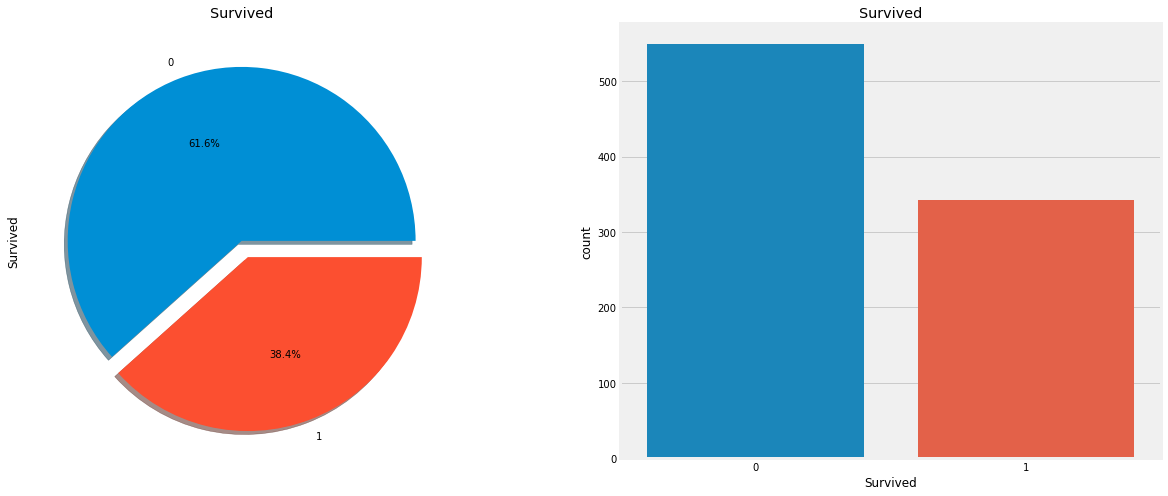

In [4]:
f, ax = plt.subplots(1, 2, figsize=(19, 8))

# figure 1. 생존자/사망자를 pie plot으로
data['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[1].set_ylabel('')

# figure 2. 생존자/사망자를 count plot으로
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

생존자/사망자 비율을 보면 사망자가 많다는 것을 알 수 있다. 약 **38.4%**만이 타이타닉에서 생존을 했다.

> `💡 TIP` Feature의 종류   
> - **categorical feature** : 두 개 이상의 카테고리를 갖고 각 value로 카테고리화가 가능한 피처 (하지만 순서를 매길 수 없음)
>    - `ex.` Sex, Embarked
> - **ordinal feature** : categorical feature와 비슷하지만 순서가 있는 혹은 정렬이 가능한 피처
>    - `ex.` Pclass
> - **continuous feature** : value가 어떤 두 값 사이의 한 부분인 피처
>    - `ex.` Age

### 1.1. Analysis of the features
#### 1.1.1. Sex - Categorical Feature

In [5]:
# sex와 survived를 기준으로 grouping
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

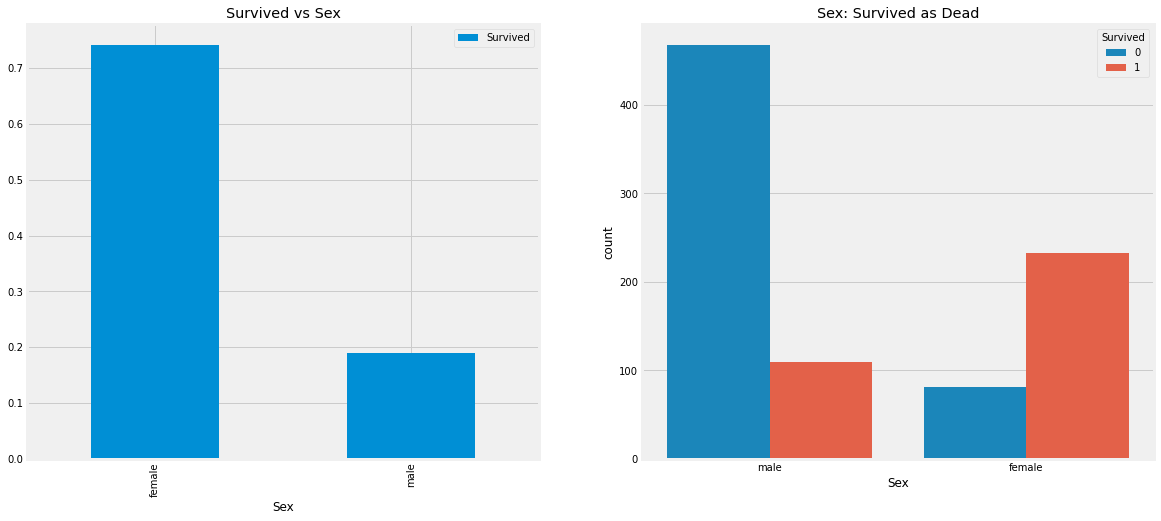

In [6]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# sex를 기준으로 grouping하여 생존율 평균을 계산
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# sex별 생존자/사망자 비교
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived as Dead')

plt.show()

배에 탄 남성이 여성보다는 많지만, **여자의 생존률이 남자보다 높다**는 걸 알 수 있다.

여성의 생존률은 **75%**지만, 남성의 생존률은 **18, 19%**이다.

#### 1.1.2. Pclass - Ordinal Feature

In [7]:
# pclass와 생존률과의 관계
pd.crosstab(data.Pclass, data.Survived,
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


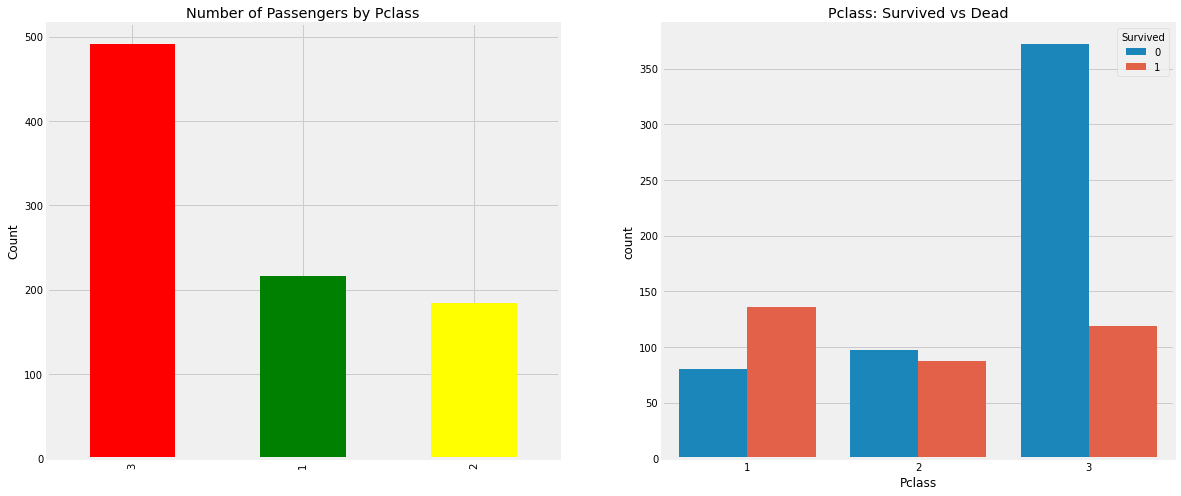

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

# 각 class별 생존자 수
data['Pclass'].value_counts().plot.bar(color=['red','green','yellow'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

# 각 class별 생존자/사망자 수
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

*돈이 모든 것을 살 수 없다*지만, 위의 그래프에 보이다 싶이 **Pclass 1인 승선자들이 생존률이 높고, 승선자가 많은 Pclass 3인 승선자들의 생존률이 낮은 것**을 볼 수 있다.

Pclass 1의 생존률은 **63%**, Pclass 2의 생존률은 **48%** 이다.

#### 1.1.3. Sex and Pclass

In [9]:
# sex와 pclass를 survived의 관계를 한 번에
pd.crosstab([data.Sex, data.Survived], data.Pclass,
            margins=True).style.background_gradient(cmap='summer_r')

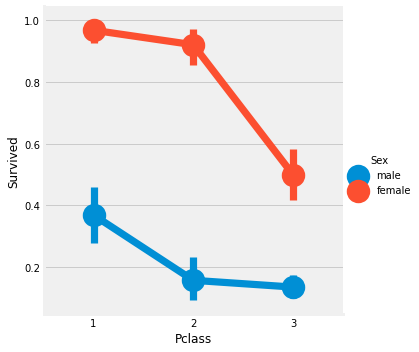

In [10]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

Factorplot과 CrossTab에서 보이듯이 **Pclass 1의 여성의 생존률은 95, 96%**임을 알 수 있다.
또한 Pclass와 무관하게 **여성이 구조 시 가장 높은 우선 순위를 가졌다**는 것을 알 수 있다. Pclass 1의 남성이라도 낮은 생존률을 보였다.

그러므로 우리는 **Pclass를 중요한 피처**라고 생각할 수 있다.

#### 1.1.4. Age - Continuous Feature

* 10살 이하의 어린 아이는 Pclass가 높아질수록 증가한다.
* Pclass와 상관 없이 10살 이하의 어린 아이의 생존률이 높다.
* Pclass의 20대에서 50대 승선자들의 생존률이 여성보다 생존률이 높다.
* 남자의 경우 나이가 많을수록 생존률이 낮아진다.

In [11]:
print('가장 나이가 많은 사람의 나이 :', data['Age'].max())
print('가장 나이가 적은 사람의 나이 :', data['Age'].min())
print('배에 탄 사람의 평균 나이 :', data['Age'].mean())

가장 나이가 많은 사람의 나이 : 80.0
가장 나이가 적은 사람의 나이 : 0.42
배에 탄 사람의 평균 나이 : 29.69911764705882


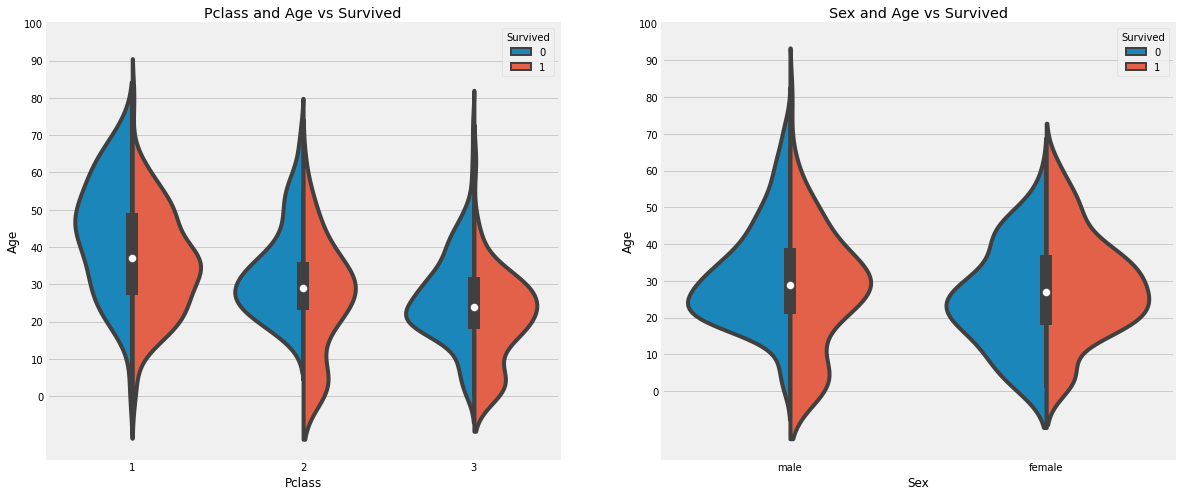

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

# Pclass와 Age에서의 생존/사망 분포
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Sex와 Age에서의 생존/사망 분포
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

**Age**는 177개의 null 값이 존재한다. 이 값을 채우기 위해 데이터셋의 평균 나이로 채울 수 있다. 하지만 이게 문제가 없을까? 이 데이터에는 다양한 나이대의 사람들이 존재한다. 나이가 없는 4살 아이에게 평균 나이 29살을 채울 수 없는 노릇이다. 그래서 우리는 **Name** 피처에 있는 `Mr`, `Mrs`와 같은 인사말(salutation)을 활용해서 대충의 나이대를 추론할 수 있다.

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')    # 인사말(salutation 추출)

여기서 우리가 추출하고자 하는 것은 `[A-Za-z]+`에 점(`.`)으로 끝나는 string이다. 그렇게 해서 성공적으로 **Name** 피처에서 **Initial**을 추출할 수 있다.

In [14]:
# 성별에 따른 Initial 분포
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


`Mlle`나 `Mme`와 같이 `Miss`를 잘못 적은 부분이 몇 곳이 있다. 이런 잘못된 것들은 올바른 단어로 대체(replace)해준다.

In [15]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], [
                        'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [16]:
# 각 Initial별 평균 나이대
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

위에서 각 **Initial**별 나이대를 null 데이터에 채워준다.

In [17]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 26

In [18]:
# null 값이 없는 확인
data.Age.isnull().any()

False

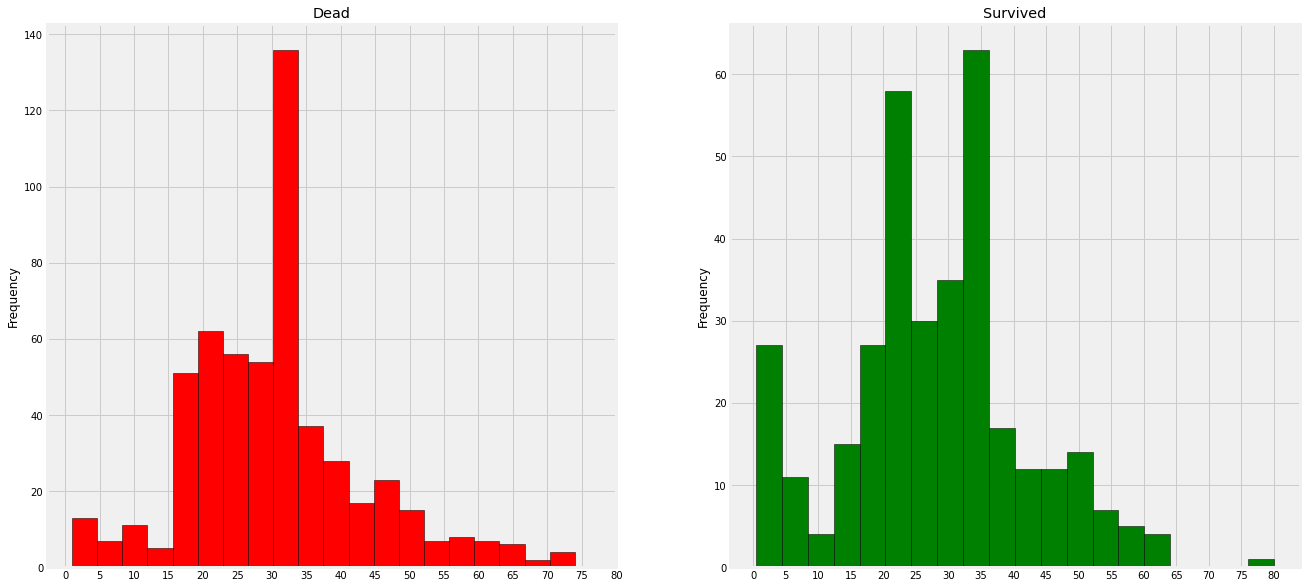

In [19]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(
    ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Dead')
ax[0].set_xticks(range(0, 85, 5))

data[data['Survived'] == 1].Age.plot.hist(
    ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived')
ax[1].set_xticks(range(0, 85, 5))

plt.show()

* 5살 이하의 아이들의 대부분은 생존을 했다.
* 나이가 많은 80대 승선객들은 생존했다.
* 최대 사망자수를 가진 그룹은 30, 40대이다.

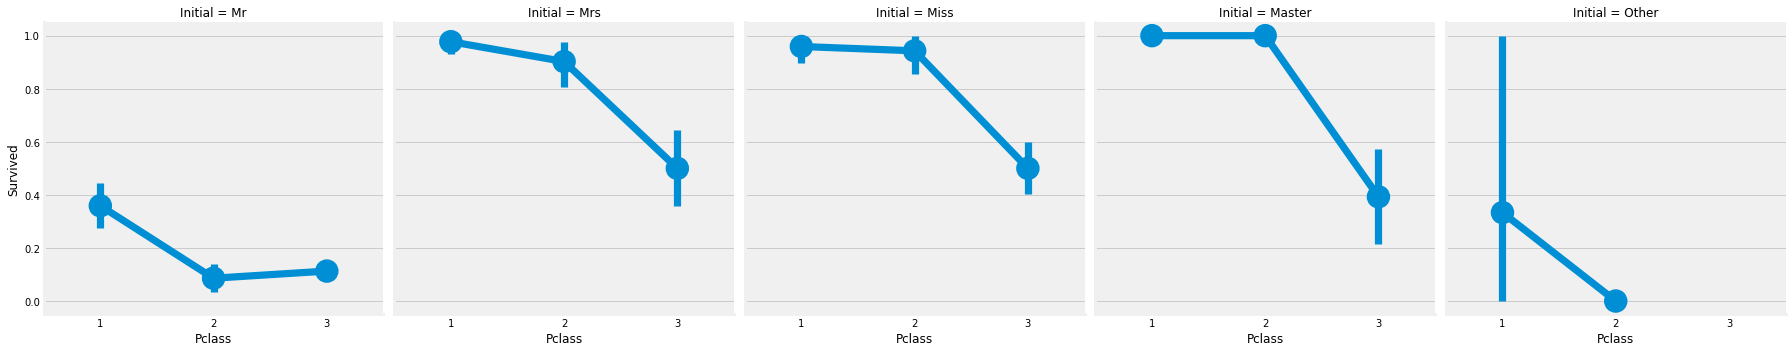

In [20]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

여성과 아이에 해당하는 `Mrs`,`Miss`,`Master`의 생존률이 높음을 알 수 있다. 
**Pclass와 상관 없이 여성과 아이를 가장 먼저 구한 정책**은 맞다고 볼 수 있다.

#### 1.1.5. Embarked - Categorical Value

In [21]:
# Embarked와 Pclass, Sex, Survived와의 관계
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

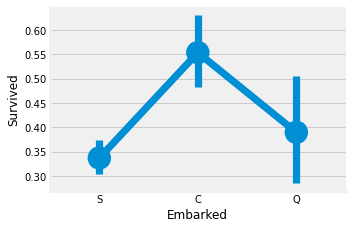

In [22]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()   # 현재 figure에 접근
fig.set_size_inches(5,3)    # figure의 크기 변경
plt.show()

**항구 C**에서 승선했을 때 생존률이 55%로 높았다.

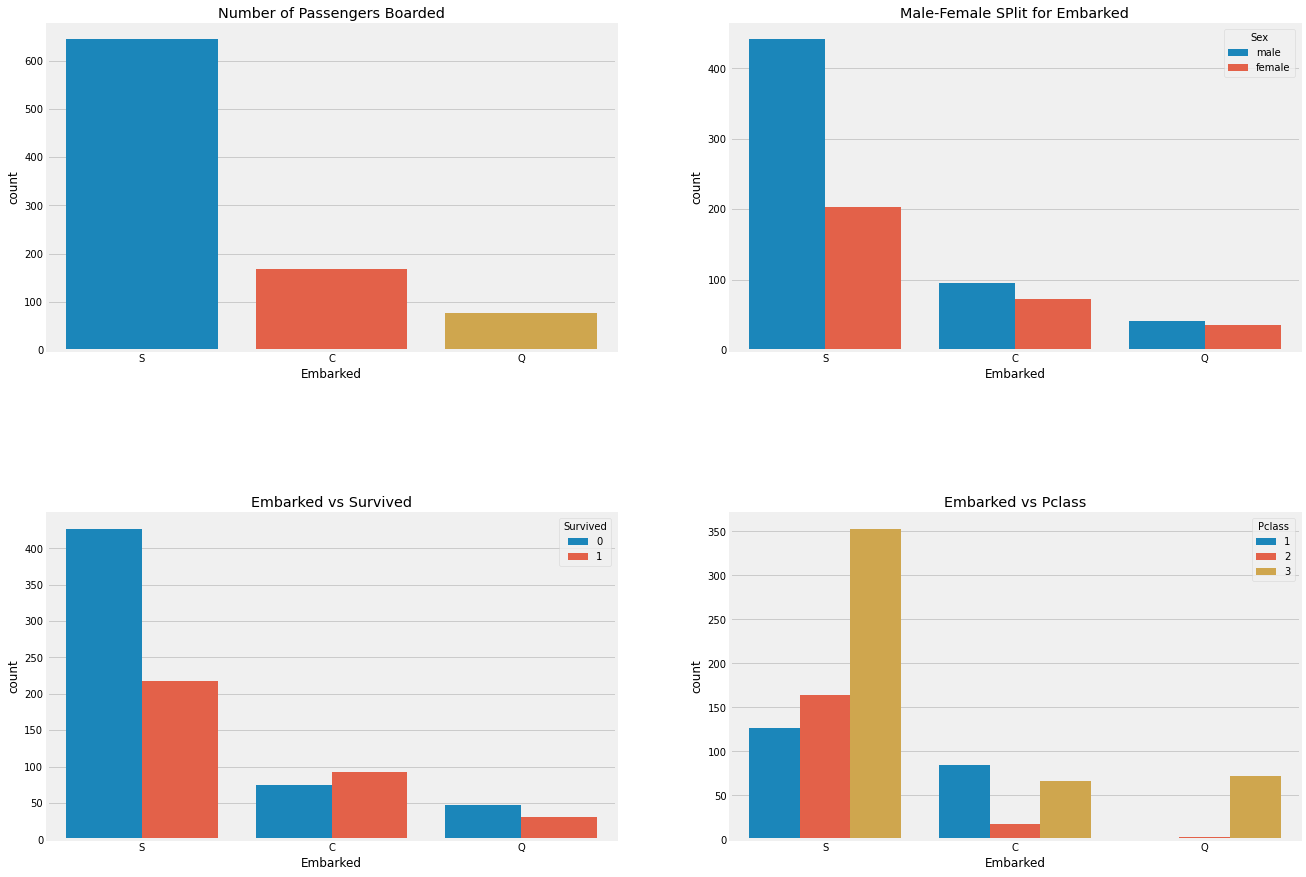

In [24]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# 항구별 승선자 수
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Number of Passengers Boarded')

# 항구에 따른 성별 분포
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female SPlit for Embarked')

# 항구에 따른 생존/사망자 분포
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

# 항구에 따른 클래스 분포
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 항구 S에서 가장 많은 승객이 탔으며, 항구 S의 대부분의 승선객들은 Pclass 3였다.
* 항구 C에서 탄 사람은 다른 항구에 비해 생존률이 높다. 그 이유로는 Pclass1과 Pclass2 이용자가 많은 것으로 추측된다.
* 항구 S에서 돈이 많은 사람들이 탄 것으로 보이지만, 항구 S의 생존률이 낮은 이유는 대부분의 승선객이 Pclass3이기 때문인 것으로 보인다.
* 항구 Q의 95%는 Pclass3였다.

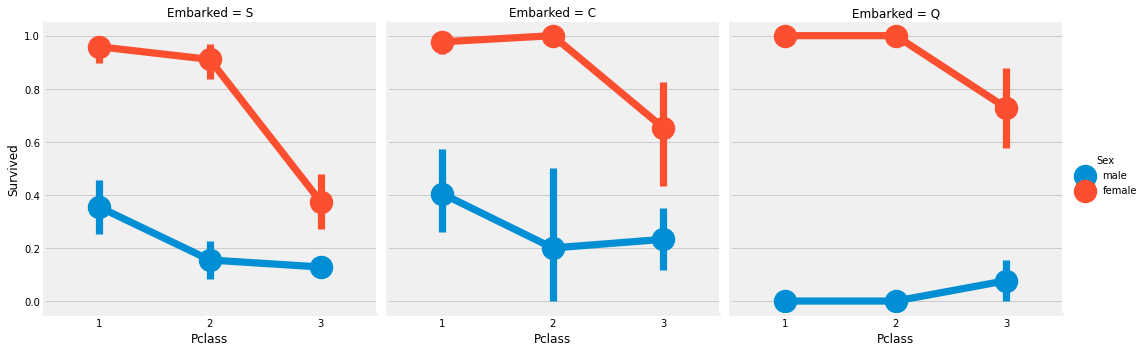

In [25]:
# 각 항구 별 Pclass와 Survived에 따른 성별 분포
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)

* Pclass와 무관하게 Pclass1과 Pclass2의 여성이 높은 생존률을 보인다.
* 항구 S에서 Pclass3 사람들은 성별과 무관하게 생존률이 매우 낮다.
* 항구 Q에서 탄 남성은 매우 운이 좋지 않다. 이 항구에서 탄 대부분의 사람들은 Pclass3였다.

**Embarked**도 null 값이 존재한다. 대부분의 승선객들이 항구 S에서 탔으므로, null 값을 S로 채울 것이다.

In [27]:
data['Embarked'].fillna('S', inplace=True)
data.Embarked.isnull().any()   # null값 있는지 확인

False

#### 1.1.6. SibSp - Discrete Feature
**SibSp**를 가지고 혼자 탔는지 아니면 가족과 함께 탔는지 알 수 있다.

In [29]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(
    cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


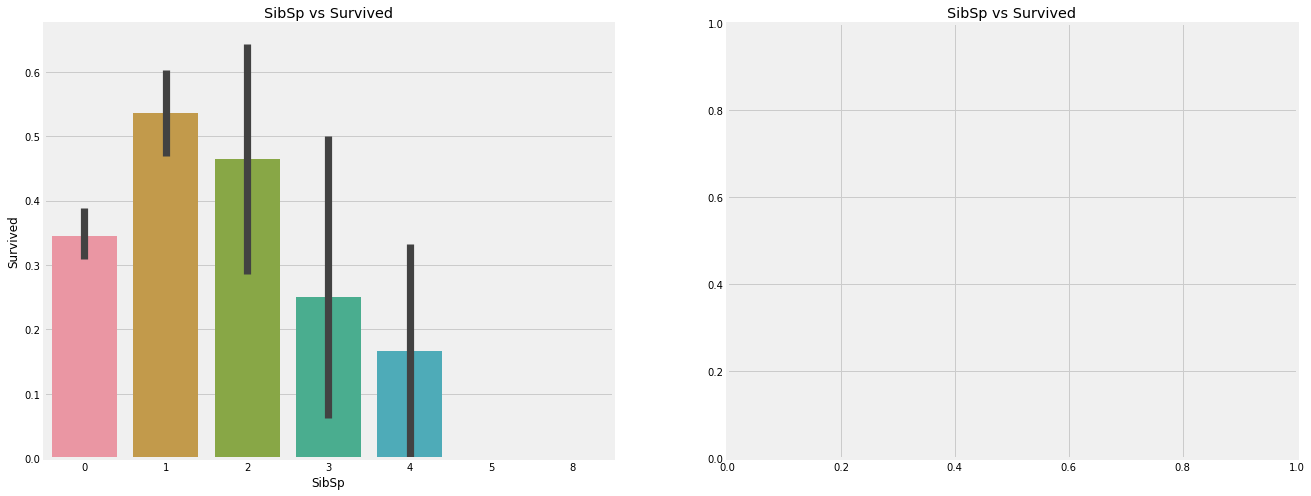

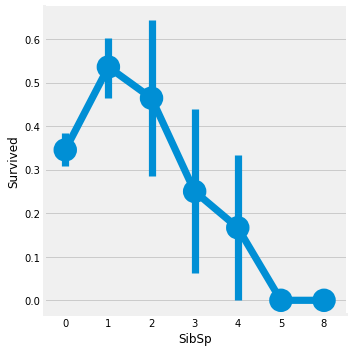

In [37]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# SibSp와 생존률과의 관계를 barplot으로
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

# SibSp와 생존률과의 관계를 factorplot으로
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [38]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


* 가족이 아닌 혼자 온 사람들의 경우 **35.4%**의 생존률을 보여준다.
* 가족의 수가 증가할수록 생존률은 급격하게 떨어진다.
    * 왜? 가족을 구하기 위해서.
* 가족의 수가 5명에서 8명인경우 생존률은 **0%**이다.
    * 왜? Pclass 때문이다! `crosstab`에서 보이는 것처럼 가족의 수가 4명 이상인 사람들은 Pclass 3밖에 없다.
    * Pclass 3이고 가족의 수가 4명 이상인 경우 모두 사망한 것으로 보인다.

#### 1.1.7. Parch - Discrete Feature

In [39]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


`crosstab`에서 보이다 싶이 Pclass3일 때 가족의 수가 많다.

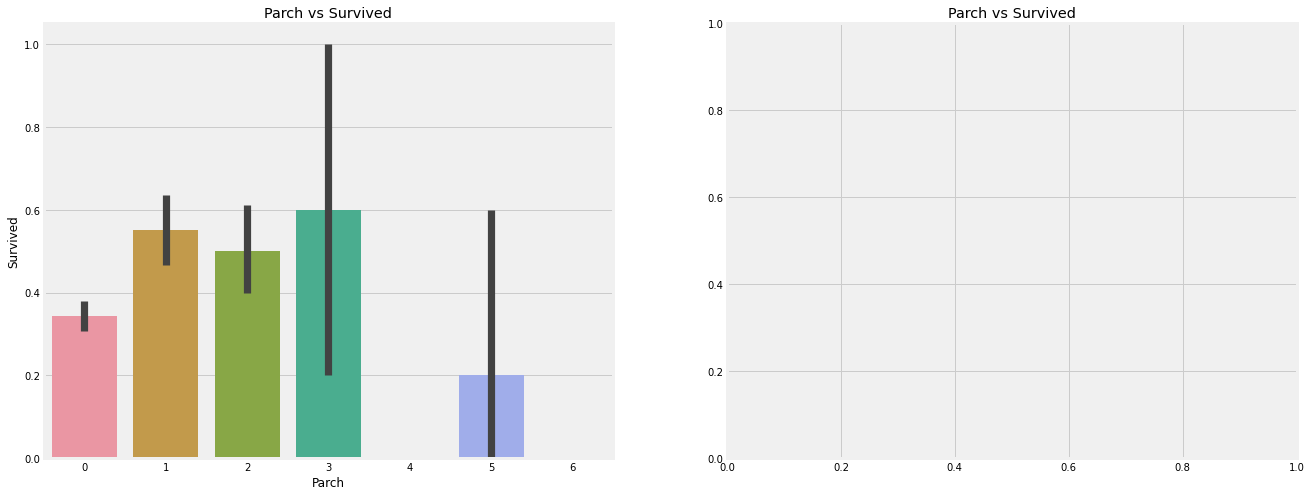

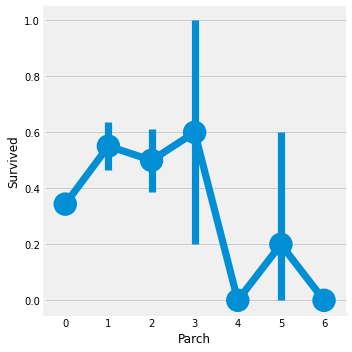

In [43]:
f, ax = plt.subplots(1, 2, figsize=(20,8))

# Parch와 생존률 관계를 barplot으로
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

# Parch와 생존률 관계를 factorplot으로
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

* 승선객이 부모와 함께 탔을 경우 생존률을 높이진다.
    * 하지만 너무 많으면 생존률이 급격하게 떨어진다.
* 1명에서 3명 정도의 부모 혹은 자식과 탔으면 생존률은 꽤 높다.
* 혼자 타거나 부모자식이 5명 이상일 경우 생존률은 급격하게 떨어진다.

#### 1.1.8. Fare - Continuous Feature

In [44]:
print('Highest Fare :', data['Fare'].max())
print('Lowest Fare :', data['Fare'].min())
print('Average Fare :', data['Fare'].mean())

Highest Fare : 512.3292
Lowest Fare : 0.0
Average Fare : 32.2042079685746


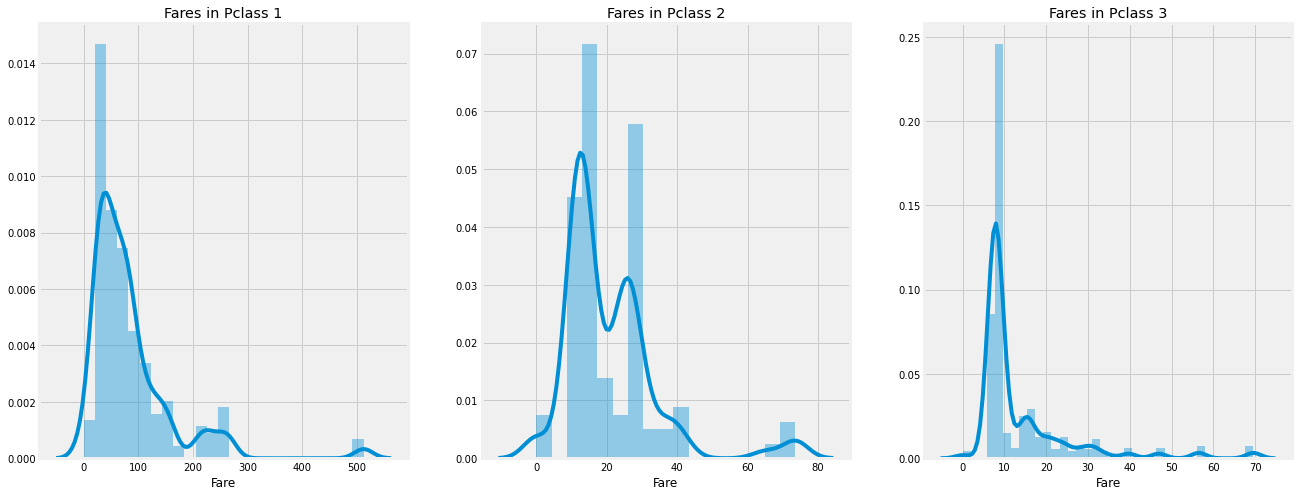

In [45]:
f,ax=plt.subplots(1,3,figsize=(20,8))

# 각 Pclass별 요금 분산 정도
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

* Pclass1을 이용하는 사람들의 요금(fare)는 매우 분산되어 있다. 그런가? 오히려 Pclass2가 더 분산되어 있는 듯 한데..
* continuous한 값이기 때문에 그룹을 나누어 discrete한 값으로 변환할 수 있다.

#### 1.1.9. Observation Summary
* `Sex` : 남성보다 여성일수록 생존률이 높다.
* `Pclass` : Pclass1인 사람이 더 높은 생존률을 보이는 반면, Pclass3인 이용객은 매우 낮은 생존률을 보인다.
    * 여성의 경우 Pclass2보다 Pclass1인 사람은 거의 100%에 가까운 생존률을 보인다.
* `Age` : 5살에서 10살 미만의 아이들은 높은 생존률을 보였으며, 15살에서 35살의 사람들은 대부분이 사망했다.
* `Embarked` : C 항구 승선객들은 S 항구의 Pclass 1 이용객보다 더 높은 생존률을 가진다.
    * Q 항구에서 탄 사람들의 대부분은 Pclass였다.
* `Parch+SibSp` : 1,2명의 자식/배우자 혹은 1-3명의 부모와 탄 사람의 경우 혼자 타거나 대가족과 같이 찬 사람보다 생존률이 높았다.

#### 1.1.10. Correlation Between the Features

오직 숫자로 되어 있는 피처끼리만 비교가 가능하므로, string으로 되어 있는 피처의 경우 상관관계를 알 수가 없다.
* **양의 상관관계** : A가 증가할수록 B도 증가하는 경우 (1이 최대)
* **음의 상관관계** : A가 증가할수록 B는 감소하는 경우 (-1이 최대)

이 상관관계가 중요한 이유는 만약 2개의 피처의 상관관계가 매우 높은 경우 불필요한 피처를 제거하고 하나만 사용할 수 있기 때문이다. 그러면 모델의 학습 속도는 빨라지고 성능 향상도 기대해 볼 수 있다.

하지만 아래의 heatmap에서 매우 높은 상관관계를 보이는 피처는 없으므로 우리는 모든 피처들을 가져갈 예정이다.

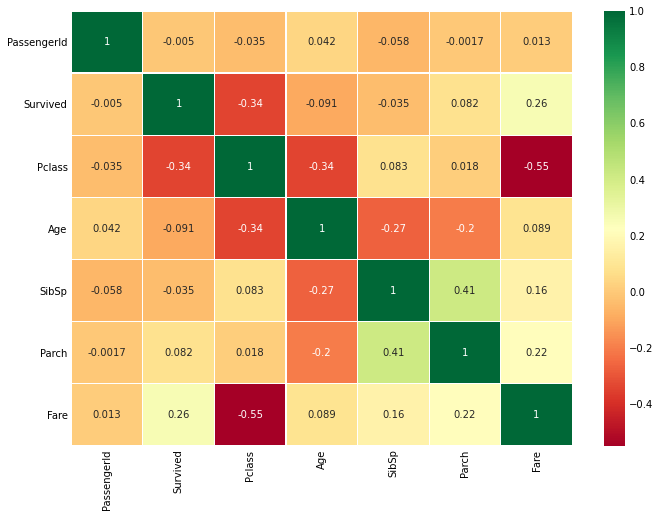

In [46]:
# corr()는 데이터셋의 피처 간 상관계수를 나타낸 matrix를 반환
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

### 1.2. Finding relations or trends

## 2. Feature Engineering and Data Cleaning

feature engineering이란 **다른 피처에서 새로운 정보를 뽑아내어 새로운 피처를 만들거나 불필요한 피처들을 제거하는 것**을 말한다.

### 2.1. Age_band
Age는 continuous한 값을 가져서 이대로 모델에 넣는다면 문제를 일으킬 수 있다. `Binning`이나 `Normalization`을 통해 **continous한 값을 categorical하게 변환**할 필요가 있다.

최대값이 80이기에 0부터 80까지 5개의 그룹(bin)으로 나눌 것이고 각 그룹의 사이즈(bin size)는 16이 될 것이다.

In [47]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


> **Series.to_frame(name=None)**
> - `name` : Series
> - Series를 DataFrame으로 변환 후 반환

In [48]:
# 각 band별 승성객 수 파악
data['Age_band'].value_counts().to_frame(
).style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


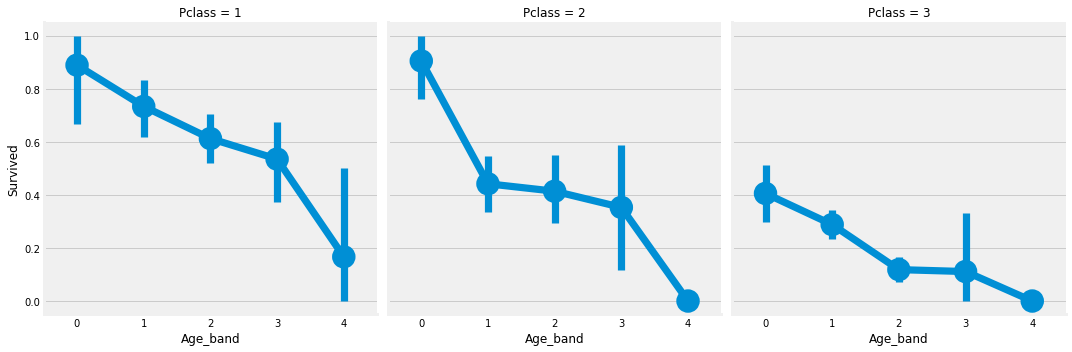

In [49]:
# 나이 band별 생존/사망자수 파악
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

Pclass와 상관없이 나이가 증가할수록 생존률이 낮아지는 것을 볼 수 있다.

### 2.2. Family_Size and Alone

이 두 개의 새로운 피처는 **Parch**와 **SibSp**를 가지고 추출해낸 피처이다.

In [50]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0

# 어떤 가족도 없는 경우 Alone == 1
data.loc[data.Family_Size == 0, 'Alone'] = 1

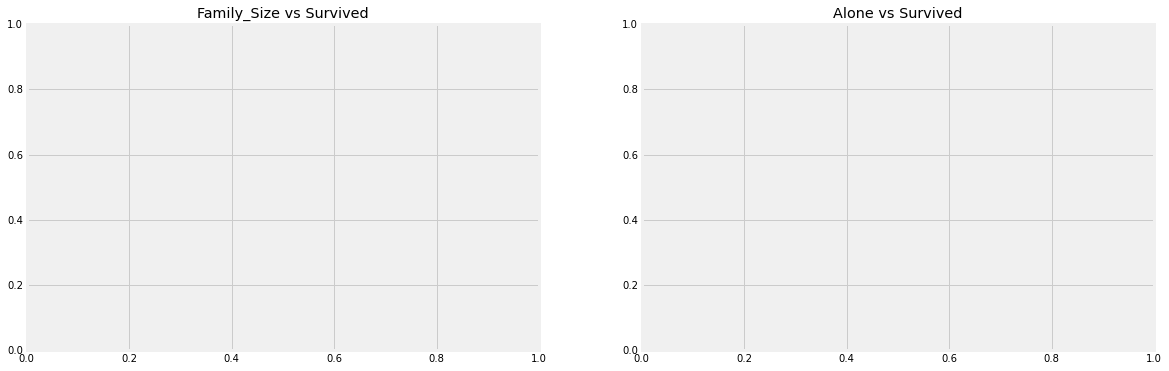

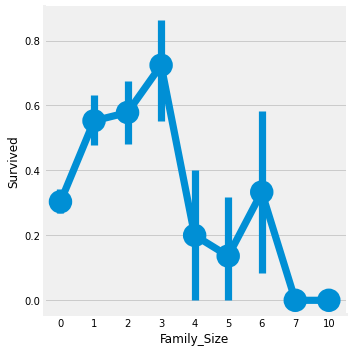

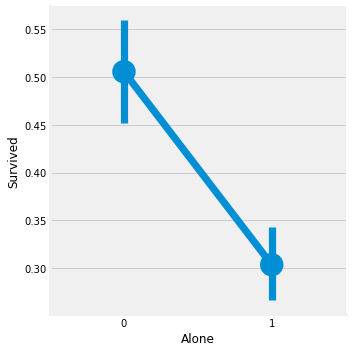

In [52]:
f, ax = plt.subplots(1, 2, figsize=(18,6))

# 가족크기와 생존률의 관계
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

# 혼자 여부와 생존률의 관계
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

혼자 탑승한 경우 생존률이 매우 낮은 것을 확인할 수 있다. 또한 가족이 4명 이상인 경우도 생존률이 감소하는 것을 볼 수 있다.

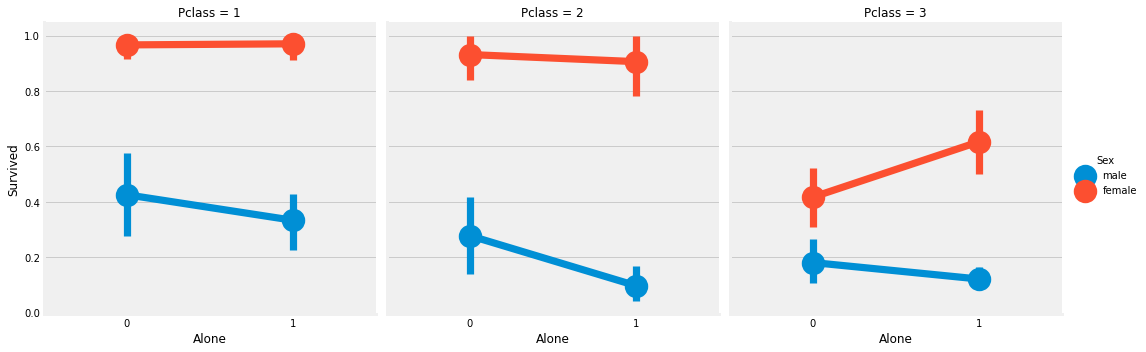

In [53]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

Pclass3을 제외하고 **Sex**와 **Pclass**와 상관 없이혼자인 경우 생존률이 낮다는 것을 알 수 있다. 
Pclass3의 여성의 경우 가족과 탄 것보다는 혼자 있는 경우 더 생존률이 높다.

### 2.3. Fare_Range
fare도 continuous한 피처이기 때문에 ordinal한 값으로 변환해줘야 한다. 이를 위해 `pandas.qcut`를 이용할 것이다. 이 함수는 내가 정하는 bin의 개수에 따라 값을 적절하게 나눠준다.

> **pandas.qcut(x, q)**
> - `x` : 나눌 Series
> - `q` : 자르고 싶은 bin의 개수

In [54]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean(
).to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


**Fare_Range**가 증가할수록 생존할 확률이 높아지는 것을 볼 수 있다. 하지만 위와 같이 그대로 모델에 넣을 수 없으므로 **Age_Band**처럼 하나의 값으로 변환을 해주어야 한다.

In [55]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

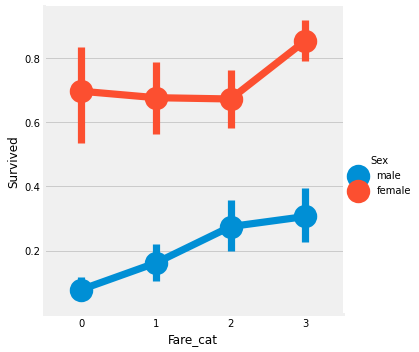

In [56]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

확실히 **Fare_cat**이 증가할수록 생존 확률이 높아지는 것을 볼 수 있다.

### 2.4. Converting String Values into Numeric

머신러닝 모델에 string을 넣을 수 없으므로, 우리는 **Sex**, **Embarked** 등과 같은 string 피처를 numeric한 값으로 바꿔줘야 한다.

In [57]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [
                        0, 1, 2, 3, 4], inplace=True)

### 2.5. Dropping UnNeeded Features

**Name, Age, Ticket, Fare, Cabin, Fare_Range, PassengerId**처럼 아에 쓸모가 없거나 다른 피처로 변환되어 필요가 없어진 피처를 버린다.

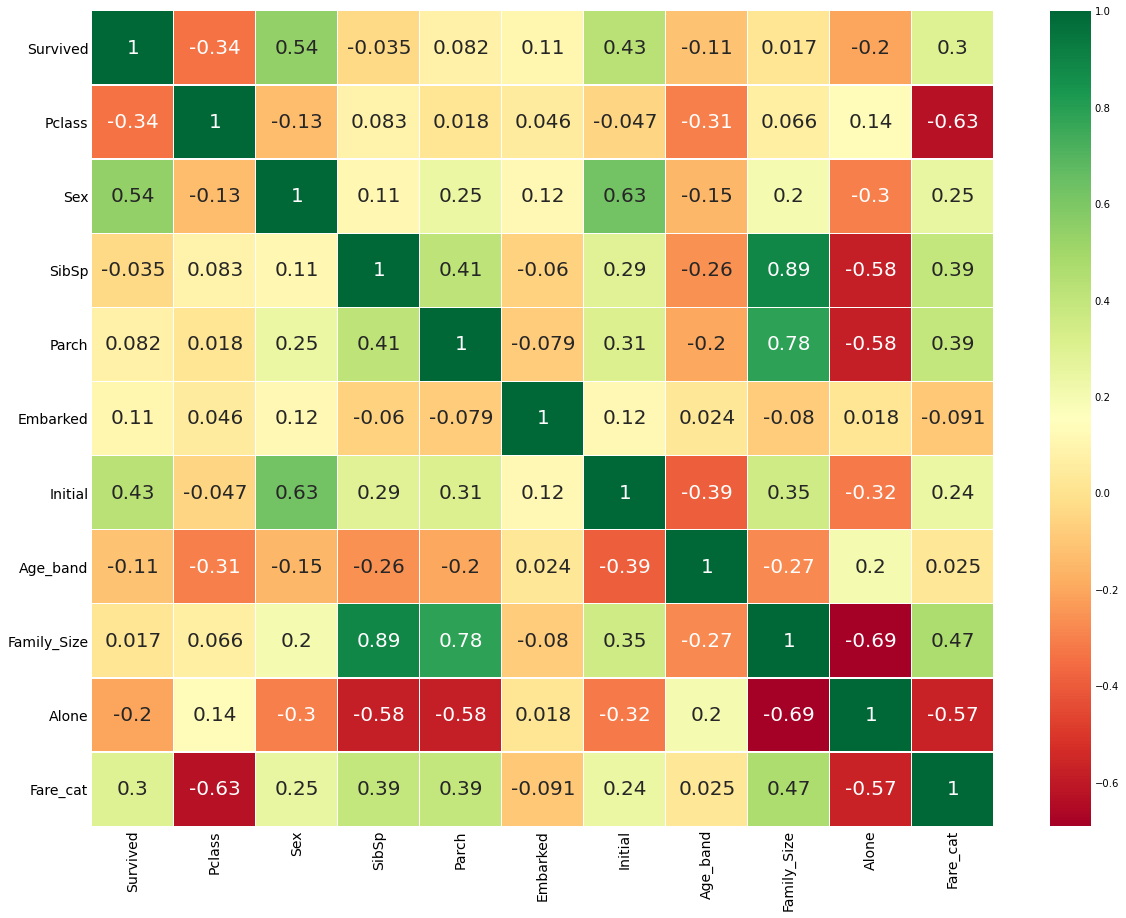

In [58]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin',
           'Fare_Range', 'PassengerId'], axis=1, inplace=True)

# 남은 피처들을 가지고 상관관계 파악
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',
            linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## 3. Predictive Modeling
아래의 모델들을 사용할 예정
* Logistic Regression
* Support Vector Machines(Linear and radial)
* Random Forest
* K-Nearest Neighbours
* Naive Bayes
* Decision Tree
* Logistic Regression

In [59]:
# machine learning models
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn import svm  # support vector Machine
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.naive_bayes import GaussianNB  # Naive bayes
from sklearn.tree import DecisionTreeClassifier  # Decision Tree

# methods for model
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics  # accuracy measure
from sklearn.metrics import confusion_matrix  # for confusion matrix

In [60]:
# train과 valid 데이터셋으로 구분
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

# target 추출
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

# 데이터에서 target 추출
X = data[data.columns[1:]]
Y = data['Survived']

### 3.1. Running Basic Algorithms
#### 3.1.1. Radial Support Vector Machine (rbf-SVM)

In [61]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf-SVM :', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf-SVM : 0.835820895522388


#### 3.1.2. Linear Support Vector Machine (linear-SVM)

In [63]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy of linear-SVM :', metrics.accuracy_score(prediction2, test_Y))

Accuracy of lienear-SVM : 0.8171641791044776


#### 3.1.3. Logistic Regression

In [64]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy of Logistic Regression :',
      metrics.accuracy_score(prediction3, test_Y))

Accuracy of Logistic Regression : 0.8134328358208955


#### 3.1.4. Decision Tree

In [66]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy of Decision Tree :', metrics.accuracy_score(prediction3, test_Y))

Accuracy of Decision Tree : 0.8134328358208955


#### 3.1.5. K-Nearest Neighbours (KNN)

In [68]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy of KNN :', metrics.accuracy_score(prediction5, test_Y))

Accuracy of KNN : 0.832089552238806


`n_neighbours` 변수는 기본적으로 **5**이고, 이걸 바꿔가면서 정확도를 체크해보자.

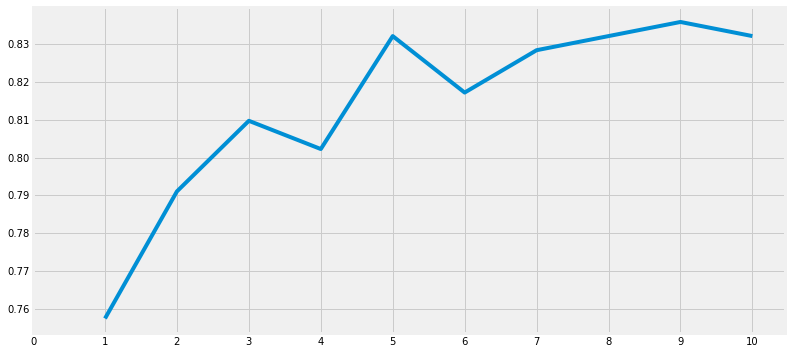

Max Accuracy (Value, Accuracy) : ( [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] , 0.835820895522388 )


In [73]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 변수 바꿔가면서 학습
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

# 시각화
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print('Max Accuracy (Value, Accuracy) : (', a.values, ',', a.values.max(), ')')

#### 3.1.6. Gaussian Naive Bayes

In [77]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy of Naive-Bayes :', metrics.accuracy_score(prediction6, test_Y))

Accuracy of Naive-Bayes : 0.8134328358208955


#### 3.1.7. Random Forests

In [78]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy of Random Forest :', metrics.accuracy_score(prediction7, test_Y))

Accuracy of Random Forest : 0.8097014925373134


### 3.2. Cross Validation

데이터가 한 쪽으로 쏠려있는 불균형한(imbalanced) 상태라면 모든 종류에 대하여 학습을 시키도록 할 필요가 있다. 그래서 **교차 검증(Cross Validation)**을 함으로써 매 학습 혹은 테스트 때마다 다른 데이터로 학습을 하도록 하고 마지막에 평가 지표를 평균 냄으로써 성능을 파악할 수 있다.

### 3.3. Ensembling
### 3.4. Important Features Extraction